In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from imageio import imread
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image
from tensorflow.keras.layers import Input, Concatenate, Dropout, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load data from Excel
data = pd.read_excel('/Users/prachi/Documents/Semester2/NNDL/Project_F/NNDL_Project_F/CSV Datafile.xlsx')

In [3]:
np.unique(data['Sky'])

array(['Overcast', 'Partly Cloudy', 'Sunny'], dtype=object)

/var/folders/8g/z0__2mts0rnbjh3kq8zsfz2w0000gn/T/ipykernel_31371/3850873133.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread(image_file)


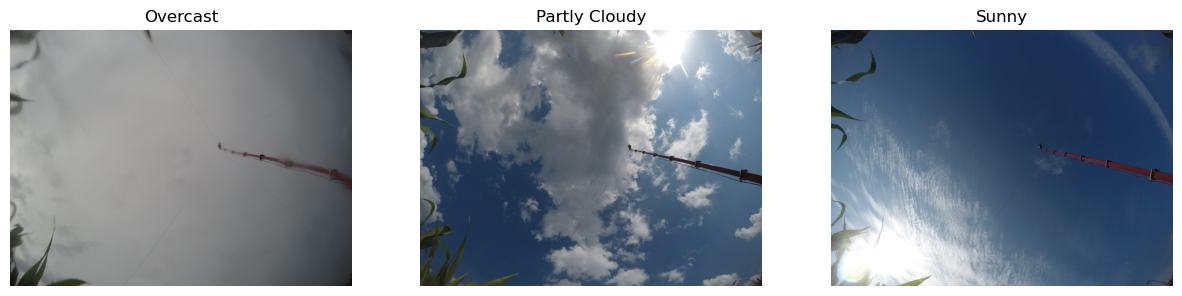

In [4]:
plt.figure(figsize=(15, 5))
df = data.iloc[400:]
for i, condition in enumerate(np.unique(data['Sky']), start=1):
    image_file = df[df['Sky'] == condition]['IMAGE'].iloc[0]  
    
    image = imread(image_file)
    
    # Plotting
    plt.subplot(1, len(np.unique(data['Sky'])), i)
    plt.imshow(image)
    plt.title(condition)
    plt.axis('off')

plt.show()

In [5]:
def convert_time(t):
    if isinstance(t, float):
        seconds = t * 86400  # convert fraction of day to seconds
        return pd.to_datetime('today').normalize() + pd.to_timedelta(seconds, unit='s')
    else:
        return pd.to_datetime(t, format='%H:%M:%S').time()

def parse_time(t):
    try:
        return pd.to_datetime(t, format='%H:%M:%S').time()
    except ValueError:
        return pd.to_datetime(t).time()
        
def time_to_decimal(t):
    return t.hour + t.minute / 60 + t.second / 3600

data['Time'] = data['Time'].apply(convert_time).apply(parse_time)
data['TimeDecimal'] = data['Time'].apply(time_to_decimal)

data

,Time,IMAGE,DOLP,Cloud Coverage,Sky,TimeDecimal
0,10:45:00,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.122028,48.967867,Partly Cloudy,10.750000
1,10:50:00,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.110792,49.289283,Partly Cloudy,10.833333
2,11:50:00,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.071582,48.272792,Partly Cloudy,11.833333
3,12:15:00,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.077421,86.216933,Sunny,12.250000
4,12:40:00,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.286818,47.495025,Partly Cloudy,12.666667
...,...,...,...,...,...,...
723,16:45:00,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.172934,31.220458,Partly Cloudy,16.750000
724,17:45:00,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.194597,44.797783,Partly Cloudy,17.750000
725,18:45:00,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.227131,52.975883,Sunny,18.750000
726,19:45:00,/Volumes/Doraemon /BRDF 2021/Data_Skycam/DCIM/...,0.295154,3.778183,Overcast,19.750000


/var/folders/8g/z0__2mts0rnbjh3kq8zsfz2w0000gn/T/ipykernel_31371/662449498.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  scatter_plot.set_xticklabels(xtick_labels)


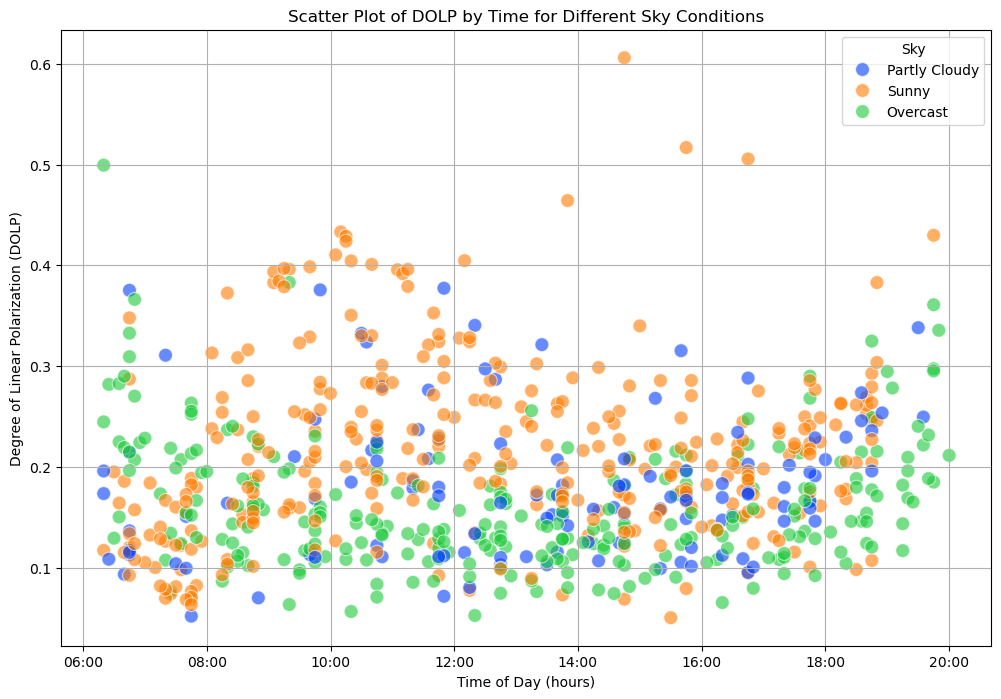

In [6]:
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='TimeDecimal', y='DOLP', hue='Sky', data=data, palette='bright', s=100, alpha=0.6)
plt.title('Scatter Plot of DOLP by Time for Different Sky Conditions')
plt.xlabel('Time of Day (hours)')
plt.ylabel('Degree of Linear Polarization (DOLP)')
plt.grid(True)

xticks = scatter_plot.get_xticks()
xtick_labels = [pd.Timestamp(f"2024-01-01 {int(x)}:{int((x%1)*60):02d}").strftime('%H:%M') for x in xticks]
scatter_plot.set_xticklabels(xtick_labels)

plt.show()

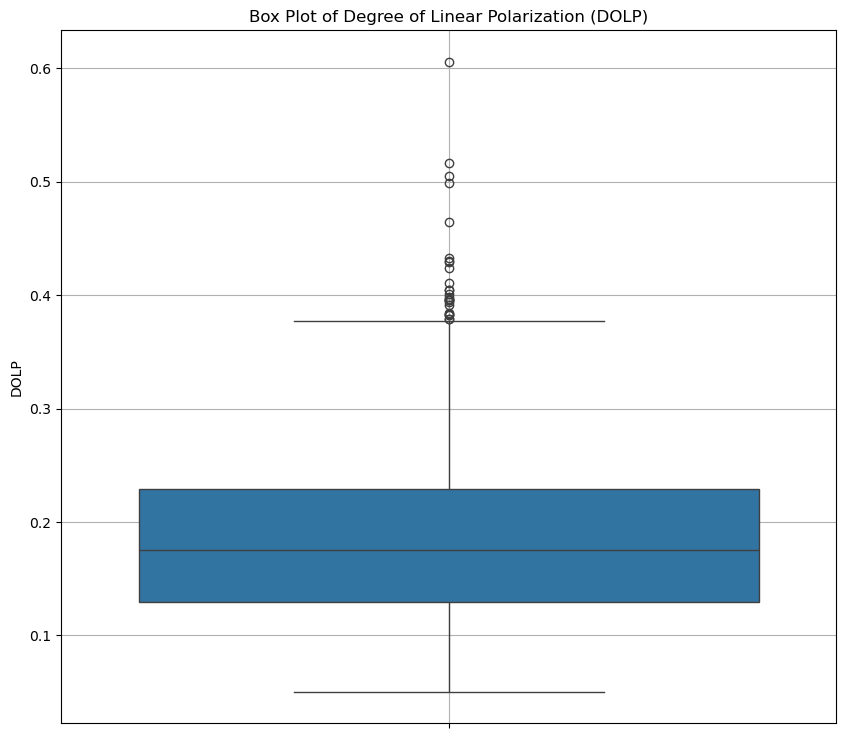

In [8]:
plt.figure(figsize=(10, 9))
sns.boxplot(y=data['DOLP'])
plt.title('Box Plot of Degree of Linear Polarization (DOLP)')
plt.ylabel('DOLP')
plt.grid(True)
plt.show()